In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()

## tensors

In [2]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [3]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
tns  # pytorch


tensor([[1, 2, 3],
        [4, 5, 6]])

In [5]:
tns[1]

tensor([4, 5, 6])

In [6]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [7]:
tns.type()

'torch.LongTensor'

## Stochastic Gradient Descent (SGD)


In [8]:
def f(x): return x**2

In [9]:
f(-1.5)

2.25

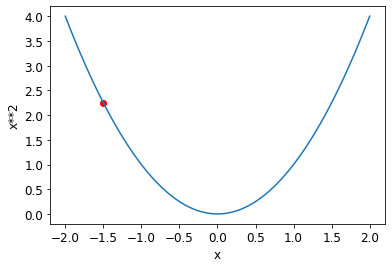

In [10]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [11]:
xt = tensor(3.).requires_grad_()

tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.

In [12]:
f(3)

9

In [13]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

PyTorch prints not just the value calculated, but also a note that it has a gradient function it'll be using to calculate our gradients when needed

In [14]:
yt.backward()

tell PyTorch to calculate the gradients for us

The "backward" here refers to backpropagation, which is the name given to the process of calculating the derivative of each layer.


In [15]:
xt.grad

tensor(6.)

 the derivative of x**2 is 2 * x, and we have x=3, so the gradients should be 2*3=6, which is what PyTorch calculated for us!

#### aaa


### (1) init 

In [16]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

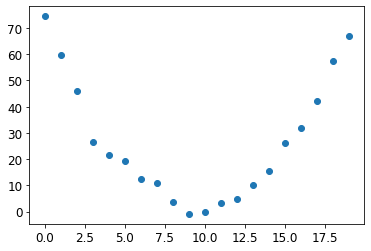

In [17]:
#target data

targetData = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,targetData);

In [18]:

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [19]:
def mse(preds, targets): return ((preds-targets)**2).mean()

### (2) Calculate the predictions

In [20]:
params = torch.randn(3).requires_grad_()
print(params)
orig_params = params.clone()
print(orig_params)

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)
tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward0>)


In [21]:
preds = f(time, params)
print(preds)

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)


In [22]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, targetData)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

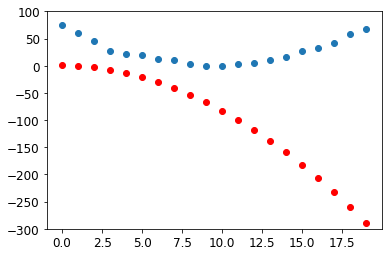

In [23]:
# show how close our predictions are to our target
show_preds(preds)

### (3) Calculate the loss

In [24]:
loss = mse(preds, targetData)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

### (4) calc grad

In [25]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [26]:
learn_rate = 1e-5
params.data -= learn_rate * params.grad.data
params.grad = None
params


tensor([-0.2339, -0.7164,  1.3551], requires_grad=True)

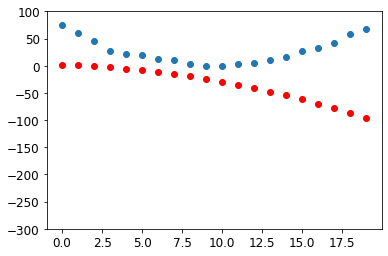

In [27]:
#test if improved

preds = f(time,params)
mse(preds, targetData)
show_preds(preds)

## repeat


In [28]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, targetData)
    loss.backward()
    params.data -= learn_rate * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [29]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


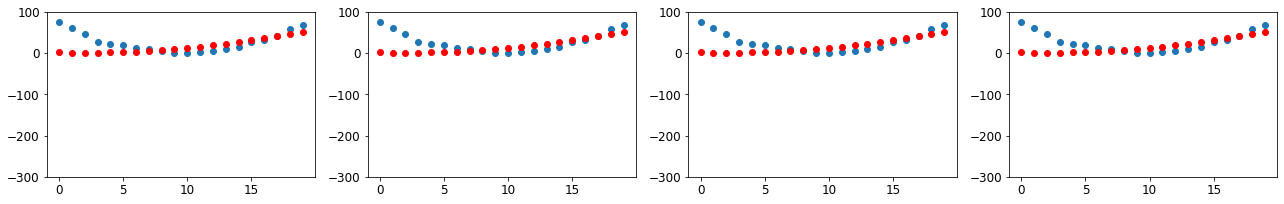

In [30]:
_,axs = plt.subplots(1,4,figsize=(18,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()